In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.metrics import r2_score as R2S
import cairo

## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2024-05-06


'2024-05-06'

In [30]:
tubulin = '[Tubulin] (' r'$\mu$' 'M)'
tub = 'tub'

DCXconc = '[DCX] (nM)' 
EBconc = '[EB] (nM)'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration (' r'$\mu$' 'M)'
Length = 'Length (' r'$\mu$' 'm)'
Lifetime = 'Lifetime (min)'
GrowthRate = 'Growth Rate (' r'$\mu$' 'm/min)'
TimeToNucleate = 'Time to Nucleate (min)'
ShrinkageLength = 'Shrink Length (' r'$\mu$' 'm)'
ShrinkageLifetime = 'Shrink Lifetime (min)'
ShrinkageRate = 'Shrink Rate (' r'$\mu$' 'm/min)'
RescuePerLength = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' ')'

In [4]:
Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']

category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [42]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]



[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


#  Open saved fit parameters  #

In [6]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
ResultFit = pd.read_csv(askFitParam, encoding='utf-8')
ResultFit[Type] = ResultFit[Type].fillna('None')
ResultFit

,Fit,SE,Coefficient,[Tubulin] ($\mu$M),DCX Type,[DCX] (nM),Parameter,Moment
0,1.070577,0.008903,0.0,12,None,0,Growth Rate ($\mu$m/min),Mean
1,0.157043,0.007290,1.0,12,None,0,Growth Rate ($\mu$m/min),Std
2,0.797346,0.025314,0.0,8,None,0,Growth Rate ($\mu$m/min),Mean
3,0.149149,0.020669,1.0,8,None,0,Growth Rate ($\mu$m/min),Std
4,0.416686,0.002427,0.0,6,None,0,Growth Rate ($\mu$m/min),Mean
...,...,...,...,...,...,...,...,...
363,5.080860,0.468668,1.0,14,None,0,Shrink Rate ($\mu$m/min),Std
364,19.051355,0.549069,0.0,10,None,0,Shrink Rate ($\mu$m/min),Mean
365,5.591572,0.456008,1.0,10,None,0,Shrink Rate ($\mu$m/min),Std
366,12.426828,0.919834,0.0,7,None,0,Shrink Rate ($\mu$m/min),Mean


In [7]:
newmydir = Path(askFitParam).parent
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/2023-08-08_fitdata-final')

## dcx EQ FIT ##

In [24]:
def pickdata(dcxtype, parameterNo):
    dcxtype_DF = ResultFit[(ResultFit[tubulin]==6) & (ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')]

    parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[parameterNo]]

    x = parameterMeanDF[DCXconc].values
    y = parameterMeanDF['Fit'].values
    yerr = parameterMeanDF['SE'].values
    
    return x,y,yerr

In [34]:
x,y,yerr = pickdata('WT', 0)
x0,y0,yerr0 = pickdata('None', 0)

X = [*x0,*x]
Y = [*y0,*y]
# X=x
# Y=y

p, cov = np.polyfit(X,Y, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mG,bG=p
p, SElin

(array([1.56756522e-04, 4.00706260e-01]), array([0.00018496, 0.02068445]))

In [35]:
R2S(Y,np.multiply(X,p[0])+p[1])

0.15223502329376337

In [36]:
x,y,yerr = pickdata('R76S', 0)
x0,y0,yerr0 = pickdata('None', 0)

X = [*x0,*x]
Y = [*y0,*y]
# X=x
# Y=y

p76, cov = np.polyfit(X,Y, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin76 = np.sqrt(var) #Refer [4]

p76, SElin76

(array([3.56732513e-04, 4.34344271e-01]), array([0.00013967, 0.01561943]))

In [37]:
R2S(Y,np.multiply(X,p76[0])+p76[1])

0.6199039098325785

In [38]:
x,y,yerr = pickdata('P191R', 0)
x0,y0,yerr0 = pickdata('None', 0)

X = [*x0,*x]
Y = [*y0,*y]
# X=x
# Y=y

p191, cov = np.polyfit(X,Y, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin191 = np.sqrt(var) #Refer [4]

p191, SElin191

(array([-4.37247026e-05,  4.08699967e-01]), array([0.00019631, 0.02195383]))

In [39]:
R2S(Y,np.multiply(X,p191[0])+p191[1])

0.012250549908347175

#  PLOT DATA  #

NameError: name 'data' is not defined

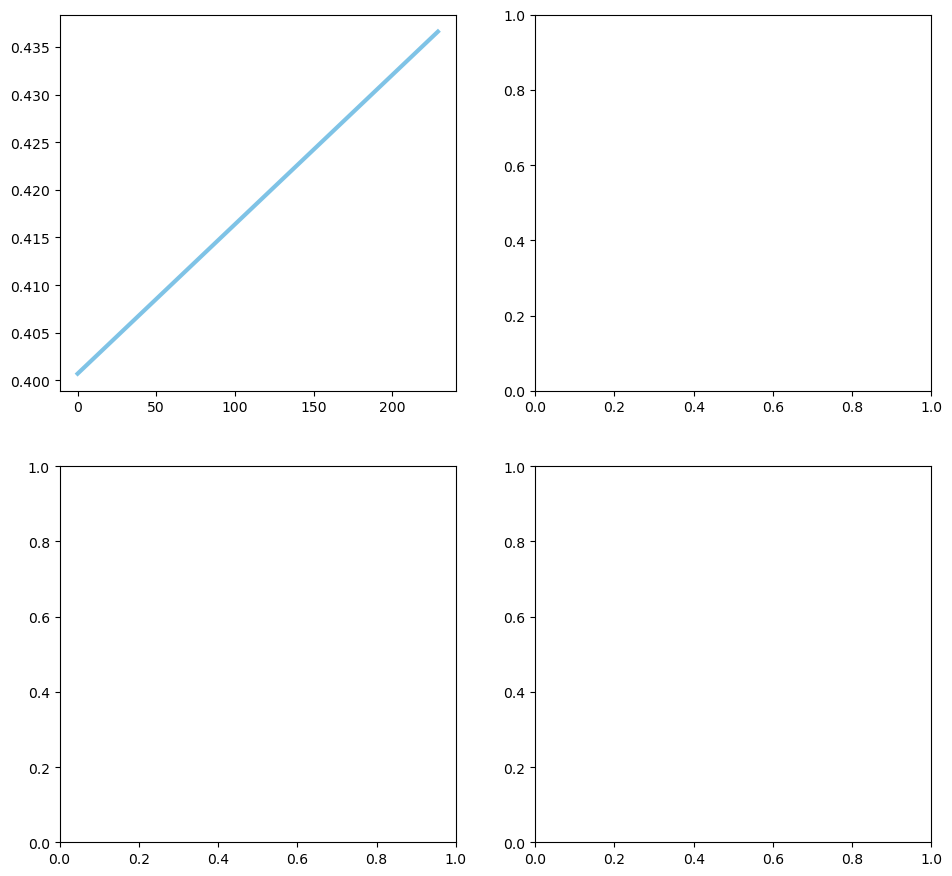

In [43]:
scattersize = 9
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shrinkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(11.25,10.75))

linx = np.arange(0, 230, 1)

ax[0][0].plot(linx, linx*p[0]+p[1] ,color = cyan, lw=3,ls= '-',alpha = 0.5)
# ax[0][0].plot(linx, linx*p76[0]+p76[1] ,color = pink00, lw=3,ls= '-',alpha = 0.5)
# ax[0][0].plot(linx, linx*p191[0]+p191[1] ,color = orange00, lw=3,ls= '-',alpha = 0.5)
# ax[1][0].plot(linx, hillEQ(linx,C1L, C2L),color = cyan, lw=3,ls= '-',alpha = 0.5)
# ax[1][0].plot(linx, michaelis_menten(linx,coeff),color = grey, lw=3,ls= '-',alpha = 0.5)

# ax[0][1].plot(linx, hillEQ_inv(linx, C1T, C2T) ,color = cyan, lw=3,ls= '-',alpha = 0.5)
# ax[0][1].plot(linx, MMEQ_inv(linx, coeffMMN) ,color = grey, lw=3,ls= '-',alpha = 0.5)
# # linx = np.arange(35, 230, 1)
# ax[1][0].plot(linx, linx*mL76+bL76 ,color = '#e468b8', lw=3,ls= '-',alpha = 0.5)
# ax[1][0].plot(linx, linx*mL191+bL191 ,color = '#ff8341', lw=3,ls= '-',alpha = 0.5)


count = 0

#palette = [grey,list(map(Color.get_hex,DC1color))[1],list(map(Color.get_hex,DC2color))[1],cyan] #+ list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
#palette = [grey,cyan]
#palette = [grey,pink00,orange00,cyan]

for dcxtype in data[Type].unique(): #['None','WT']:#ResultFit[Type].unique(): #data[Type].unique():  #['None','R76S','P191R','WT']
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')& (ResultFit[tubulin]==6)]
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[DCXconc].values
            y = parameterMeanDF['Fit'].values
            yerr = parameterMeanDF['SE'].values
            
            if dcxtype == 'None' or  dcxtype == 'WT':

                ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 1)
            
            else:
                ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count], alpha = 0.80)

            c += 1

    count += 1

ax[0][0].set_ylim(0,1)
ax[1][0].set_ylim(0,15)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,15)


# linx = np.arange(30, 230, 1)
# ax[1][1].plot(linx, linx*mS+bS,color = cyan, lw=3,ls= '-',alpha = 0.5)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-10,250)
        ax[i][j].set_xlabel(DCXconc)
        ax[i][j].set_xticks(np.arange(0, 251, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

#ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

# plt.savefig(newmydir/('dynamics_WT_growth'+date+'.svg'),backend='Cairo')

In [49]:
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/2023-08-08_fitdata-final')